# Cart Pole

![title](cart_pole_pic.png)

A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.

# Load Packages

In [1]:
import swat
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import time
import gym

# Make Environment

In [2]:
env = gym.make('CartPole-v0')

In [3]:
#DocString
?env.env

In [4]:
# Env Actions
directions = {"Left":0,"Right":1}
env.action_space

Discrete(2)

In [5]:
# Env Observation
obs = {"CartPosition":0,"CartVelocity":1,"PoleAngle":2,"PoleAngularVelocity":3}
env.observation_space

Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)

In [6]:
# Env Start
# All observations are assigned a uniform random value in [-0.05..0.05]
env.reset()

array([ 0.00594487, -0.03609262,  0.00134835,  0.03377973])

In [7]:
# Push the Cart Left Policy
env.reset()
for i in range(40):
    env.step(0)
    env.render()
    time.sleep(0.02)
    
env.close()

C:\ProgramData\Anaconda3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


# Connect to CAS

In [8]:
conn = swat.CAS("server", 30571, "student", "Metadata0")

# Create SAS RL Environment URL

In [9]:
cmd_data = subprocess.check_output(['ipconfig','/all']).decode('utf-8').split('\n')
ip_data = [item for item in cmd_data if "IPv4 Address" in item]
computer_id = ip_data[0].split(": ")[1].split("(")[0]
sasrl_env_port = "10200"
sasrl_env_url = computer_id + ":" + sasrl_env_port

# Load the RL Action Set

In [10]:
conn.loadactionset('reinforcementLearn')

NOTE: Added action set 'reinforcementLearn'.


[actionset]

 'reinforcementLearn'

+ Elapsed: 0.326s, user: 0.583s, sys: 0.925s, mem: 0.255mb

# Train the Agent - Deep Q Networks

In [11]:
results = conn.reinforcementLearn.rlTrainDqn(
    
    # RL Arguments
    environment=dict(type='remote', url=sasrl_env_url, name='CartPole-v0', render=False, seed=802),
    exploration = dict(type="linear", initialEpsilon=0.99, minEpsilon=0.05),
    gamma = 0.99,
    numEpisodes = 100,
    
    # NN Arguments
    QModel=[{'type':'FC', 'n':100, 'act':'RELU'}],
    optimizer=dict(method='ADAM', beta1=0.9, beta2=0.999, learningRate=0.001, miniBatchSize=128),
    minReplayMemory = 10,
    maxReplayMemory = 1000,
    targetUpdateInterval = 100,
    
    # Test Arguments
    testInterval = 10,
    numTestEpisodes = 10,
    
    # Other Arguments
    modelOut=dict(name='dqn_weights', replace=True),
    seed = 919
    
)

         Episode=        0 AvgQValue=0.2349 AvgTarget= 0.961 AvgLoss=0.5325 TestReward=  35.1
         Episode=       10 AvgQValue=1.9157 AvgTarget=1.9515 AvgLoss=0.0382 TestReward=   9.6
         Episode=       20 AvgQValue=3.9458 AvgTarget=3.7434 AvgLoss=0.8642 TestReward=   9.1
         Episode=       30 AvgQValue= 5.101 AvgTarget=5.6165 AvgLoss=1.1865 TestReward=   9.1
         Episode=       40 AvgQValue=6.1581 AvgTarget=6.2297 AvgLoss=0.5377 TestReward=  23.5
         Episode=       50 AvgQValue=9.3283 AvgTarget=9.4791 AvgLoss=1.1184 TestReward=  93.7
         Episode=       60 AvgQValue=14.122 AvgTarget= 13.88 AvgLoss=2.8472 TestReward=  82.3
         Episode=       70 AvgQValue=23.018 AvgTarget= 23.07 AvgLoss=0.0668 TestReward=   200
         Episode=       80 AvgQValue=35.154 AvgTarget=34.551 AvgLoss=12.076 TestReward=   200
         Episode=       90 AvgQValue=50.572 AvgTarget= 51.06 AvgLoss=2.0859 TestReward=  90.3
         Episode=      100 AvgQValue=59.577 AvgTarget=59.757

In [12]:
results['FinalResult']

,Description,Value
0,Average QValue,59.577057
1,Average Target Value,59.756817
2,Test Reward,200.000000


In [13]:
results['ModelInfo']

,Property,Value
0,Number of State Variables,4
1,Number of Actions,2
2,Algorithm,DQN
3,Optimizer,ADAM


In [14]:
results['OptIterHistory']

,Iteration,AvgQValue,AvgTarget,AvgLoss,Test Reward
0,0,0.234946,0.961002,0.532523,35.1
1,10,1.915729,1.951461,0.038171,9.6
2,20,3.945786,3.743432,0.864210,9.1
3,30,5.100967,5.616506,1.186548,9.1
4,40,6.158071,6.229697,0.537693,23.5
5,50,9.328326,9.479050,1.118423,93.7
6,60,14.122361,13.879718,2.847176,82.3
7,70,23.018005,23.070086,0.066761,200.0
8,80,35.154113,34.551386,12.075914,200.0
9,90,50.571667,51.059508,2.085892,90.3


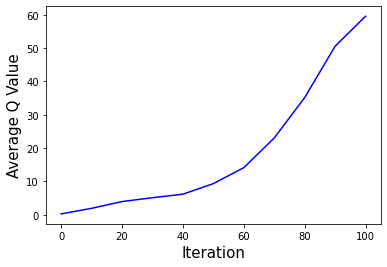

In [15]:
plt.plot(results['OptIterHistory']['Iteration'],results['OptIterHistory']['AvgQValue'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Average Q Value", fontsize=15)
plt.show()

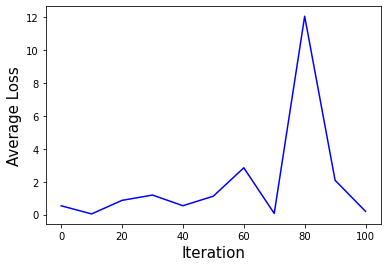

In [16]:
plt.plot(results['OptIterHistory']['Iteration'],results['OptIterHistory']['AvgLoss'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Average Loss", fontsize=15)
plt.show()

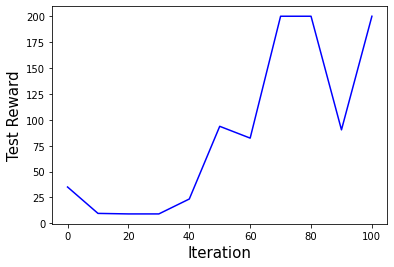

In [17]:
plt.plot(results['OptIterHistory']['Iteration'],results['OptIterHistory']['Test Reward'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Test Reward", fontsize=15)
plt.show()

# Score the Model

In [18]:
conn.reinforcementLearn.rlScore(
    environment=dict(type='remote', url=sasrl_env_url, name='CartPole-v0', 
                     render=True, renderFreq=10, renderSleep=0.02, seed=802),
    model='dqn_weights',
    numEpisodes=1,
    logFreq=1,
    casout=dict(name='scored_table', replace=True)
)

         Episode=        1 Step=        1 LastReward=     0 AverageReward=     1
         Episode=        1 Step=        2 LastReward=     0 AverageReward=     2
         Episode=        1 Step=        3 LastReward=     0 AverageReward=     3
         Episode=        1 Step=        4 LastReward=     0 AverageReward=     4
         Episode=        1 Step=        5 LastReward=     0 AverageReward=     5
         Episode=        1 Step=        6 LastReward=     0 AverageReward=     6
         Episode=        1 Step=        7 LastReward=     0 AverageReward=     7
         Episode=        1 Step=        8 LastReward=     0 AverageReward=     8
         Episode=        1 Step=        9 LastReward=     0 AverageReward=     9
         Episode=        1 Step=       10 LastReward=     0 AverageReward=    10
         Episode=        1 Step=       11 LastReward=     0 AverageReward=    11
         Episode=        1 Step=       12 LastReward=     0 AverageReward=    12
         Episode=        1 S

,Property,Value
0,Number of State Variables,4
1,Number of Actions,2
2,Algorithm,DQN
3,Optimizer,ADAM


# Download Final Test

In [19]:
scored_table = conn.CASTable(name = "scored_table")
df = scored_table.to_frame()
df

,_Step_,_Episode_,_State_0,_State_1,_State_2,_State_3,_Action_,_Reward_,_Done_
0,0.0,1.0,-0.024137,-0.035394,-0.013526,0.010430,0.0,1.0,0.0
1,1.0,1.0,-0.024845,-0.230319,-0.013317,0.298815,0.0,1.0,0.0
2,2.0,1.0,-0.029451,-0.425249,-0.007341,0.587268,1.0,1.0,0.0
3,3.0,1.0,-0.037956,-0.230025,0.004404,0.292281,1.0,1.0,0.0
4,4.0,1.0,-0.042557,-0.034966,0.010250,0.000991,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
195,195.0,1.0,0.002733,0.156469,-0.000149,-0.210347,0.0,1.0,0.0
196,196.0,1.0,0.005863,-0.038651,-0.004356,0.082289,0.0,1.0,0.0
197,197.0,1.0,0.005090,-0.233711,-0.002710,0.373595,1.0,1.0,0.0
198,198.0,1.0,0.000415,-0.038550,0.004762,0.080058,1.0,1.0,0.0


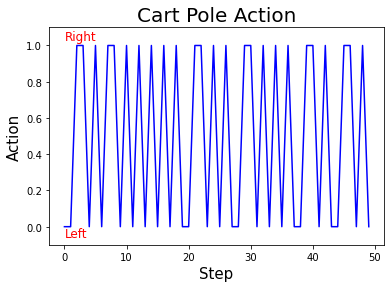

In [20]:
plt.plot(df["_Action_"][:50], color="blue")
plt.title("Cart Pole Action", fontsize=20)
plt.xlabel("Step", fontsize=15)
plt.ylabel("Action", fontsize=15)
plt.ylim(-0.1,1.1)
plt.text(0,-0.06,"Left", color="red", fontsize=12)
plt.text(0,1.03,"Right", color="red", fontsize=12)
plt.show()

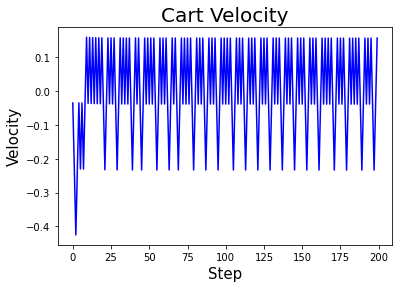

In [21]:
plt.plot(df["_State_1"], color="blue")
plt.title("Cart Velocity", fontsize=20)
plt.xlabel("Step", fontsize=15)
plt.ylabel("Velocity", fontsize=15)
plt.show()

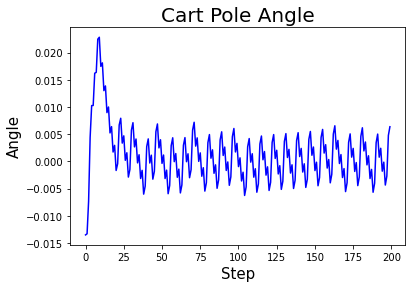

In [22]:
plt.plot(df["_State_2"], color="blue")
plt.title("Cart Pole Angle", fontsize=20)
plt.xlabel("Step", fontsize=15)
plt.ylabel("Angle", fontsize=15)
plt.show()

# End the Session

In [23]:
conn.session.endSession()

+ Elapsed: 0.000352s, user: 0.000286s, sys: 2e-05s, mem: 0.203mb